In [1]:
!pip install -q tensorflow-datasets

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_mujoco_ant',
 'd4rl_mujoco_halfcheetah',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiab

In [5]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='/Users/claudioperezrocha/tensorflow_datasets/rock_paper_scissors/3.0.0',
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",

In [6]:
train = tfds.load(name='rock_paper_scissors', split='train')

In [6]:
!pip install ipywidgets

In [7]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [7]:
test = tfds.load(name='rock_paper_scissors', split='test')

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


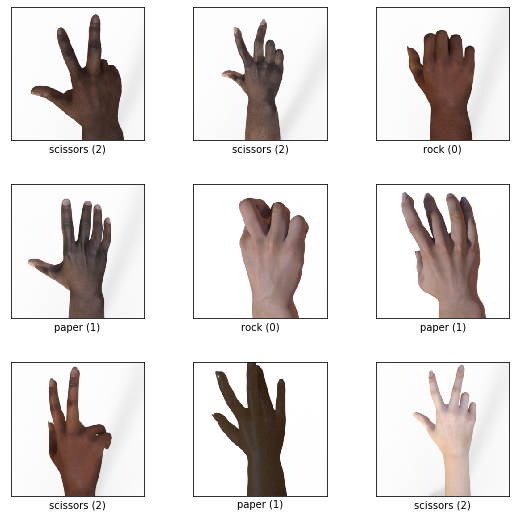

In [8]:
fig =  tfds.show_examples(info, train)

# Data Prep

In [9]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in train])

In [10]:
train_labels = np.array([example['label'].numpy() for example in train])

In [11]:
test_images = np.array([example['image'].numpy()[:,:,0] for example in test])
test_labels = np.array([example['label'].numpy() for example in test])

In [12]:
train_images.shape

(2520, 300, 300)

In [13]:
test_images.shape

(372, 300, 300)

In [14]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

In [15]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [16]:
train_images /= 255
test_images /= 255

In [17]:
train_images.dtype

dtype('float32')

# Train Network v1

In [19]:
#model = keras.Sequential([
    #keras.layers.Flatten(),
    #keras.layers.Dense(512, activation='relu'),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dense(3, activation='softmax')
#])

#model.compile(optimizer='adam',
             #loss=keras.losses.SparseCategoricalCrossentropy(),
              #metrics=['accuracy'])
#model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 17s 199ms/step - loss: 25.7948 - accuracy: 0.4250
Epoch 2/5
79/79 [==============================] - 15s 195ms/step - loss: 2.1095 - accuracy: 0.6940
Epoch 3/5
79/79 [==============================] - 15s 195ms/step - loss: 1.9472 - accuracy: 0.6730
Epoch 4/5
79/79 [==============================] - 15s 195ms/step - loss: 0.6912 - accuracy: 0.8345
Epoch 5/5
79/79 [==============================] - 15s 195ms/step - loss: 0.5995 - accuracy: 0.8357


In [20]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 33ms/step - loss: 2.6556 - accuracy: 0.5672


[2.6555912494659424, 0.5672042965888977]

# Convolution 

In [21]:
#model = keras.Sequential([
    #keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    #keras.layers.Conv2D(64, 3, activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.Dense(3, activation='softmax')
#])

In [23]:
#model.compile(optimizer='adam',
             #loss=keras.losses.SparseCategoricalCrossentropy(),
              #metrics=['accuracy'])

#model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 595s 8s/step - loss: 6.9729 - accuracy: 0.7151
Epoch 2/5
79/79 [==============================] - 524s 7s/step - loss: 0.1588 - accuracy: 0.9802
Epoch 3/5
79/79 [==============================] - 513s 6s/step - loss: 0.1308 - accuracy: 0.9810
Epoch 4/5
79/79 [==============================] - 486s 6s/step - loss: 0.0093 - accuracy: 0.9988
Epoch 5/5
79/79 [==============================] - 503s 6s/step - loss: 0.0034 - accuracy: 1.0000


In [24]:
#model.evaluate(test_images, test_labels)

12/12 [==============================] - 14s 1s/step - loss: 1.9247 - accuracy: 0.6156


[1.9247395992279053, 0.6155914068222046]

In [20]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 53s 661ms/step - loss: 1.3426 - accuracy: 0.6488
Epoch 2/5
79/79 [==============================] - 54s 681ms/step - loss: 0.1040 - accuracy: 0.9750
Epoch 3/5
79/79 [==============================] - 52s 660ms/step - loss: 0.0172 - accuracy: 0.9976
Epoch 4/5
79/79 [==============================] - 52s 662ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 5/5
79/79 [==============================] - 52s 657ms/step - loss: 0.0026 - accuracy: 1.0000


In [5]:
train_labels

NameError: name 'train_labels' is not defined

In [21]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 2s 152ms/step - loss: 1.3914 - accuracy: 0.6828


[1.3913991451263428, 0.6827957034111023]

In [24]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 145s 2s/step - loss: 0.6245 - accuracy: 0.7159
Epoch 2/5
79/79 [==============================] - 135s 2s/step - loss: 0.1243 - accuracy: 0.9623
Epoch 3/5
79/79 [==============================] - 136s 2s/step - loss: 0.1092 - accuracy: 0.9611
Epoch 4/5
79/79 [==============================] - 135s 2s/step - loss: 0.0159 - accuracy: 0.9940
Epoch 5/5
79/79 [==============================] - 136s 2s/step - loss: 0.0033 - accuracy: 0.9996


In [23]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 111ms/step - loss: 1.3909 - accuracy: 0.6989


[1.390911340713501, 0.698924720287323]

In [25]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 5s 439ms/step - loss: 2.3006 - accuracy: 0.7043


[2.3005783557891846, 0.7043010592460632]

In [26]:
predictions = np.argmax(model.predict(test_images), axis=1)

In [4]:
cm = confusion_matrix(test_labels, predictions, labels=[0, 1, 2])
clr = classification_report(test_labels, predictions, labels=[0, 1, 2], target_names=["Paper", "Rock", "Scissors"])


NameError: name 'test_labels' is not defined

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

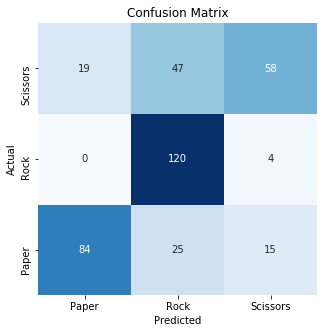

Classification Report:
----------------------
               precision    recall  f1-score   support

       Paper       0.82      0.68      0.74       124
        Rock       0.62      0.97      0.76       124
    Scissors       0.75      0.47      0.58       124

    accuracy                           0.70       372
   macro avg       0.73      0.70      0.69       372
weighted avg       0.73      0.70      0.69       372



In [48]:
# import seaborn as sns

plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
ax.set_ylim(0, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("Classification Report:\n----------------------\n", clr)

In [1]:
print("Classification Report:\n----------------------\n", clr)

NameError: name 'clr' is not defined